In [1]:
# input the years for which you want to access the data
years = [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999] 

In [2]:
# url for the chicago bulls team 
url_start = "https://www.basketball-reference.com/teams/CHI/{}.html"


In [3]:
# # gets you the data and stores it in the Storage file 
# # This is so we dont DDoS the website
# import requests

# for year in years: 
#     url = url_start.format(year)
#     data = requests.get(url)
#     f = open("Storage/{}.html".format(year), "w+", encoding="utf-8")
#     f.write(data.text)
# # Uncomment only when years changes

In [4]:
# select dataframe based on the title 
# Adding a year column so we know which year it is 
pergame_table = []
import pandas as pd 
from bs4 import BeautifulSoup

for i in years:
    with open("Storage/{}.html".format(i), encoding = "utf-8") as f: 
        page = f.read()
        soup = BeautifulSoup(page, "html.parser") # creates a parser class that will help us extract the html code from the page
        pergame = soup.find(id="per_game") # Reads data from the per_game id. 
        pd.read_html(str(pergame))[0]
        df = pd.read_html(str(pergame))[0]
        df.insert(0, "Year", i)
        # append the data frame to a list so that we have a list of dataframes for the pergame data
        pergame_table.append(df)

In [5]:
print("These are the different stats that we now have access to: \n \n", df.columns) 

These are the different stats that we now have access to: 
 
 Index(['Year', 'Rk', 'Unnamed: 1', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS/G'],
      dtype='object')


In [6]:
# Functino to easily find the relavent stats that are required and return it as a dataframe
# What we ideally need is tha

def FindStats(df): 
    names = df["Unnamed: 1"]
    FG = df["FG"]
    Assist = df["AST"]
    Blocks = df["BLK"]
    pointsPerGame = df["PTS/G"]
    Rebounds = df["TRB"]
    year = df["Year"]
    dict = {"Year": year, "Names": names, "Field Goals": FG, "Assists": Assist, "Points":pointsPerGame,
     "Blocks": Blocks, "Rebounds": Rebounds}
    return pd.DataFrame(dict)

In [7]:
pg = pergame_table[0]
A = FindStats(pg)

In [12]:
A

,Year,Names,Field Goals,Assists,Points,Blocks,Rebounds
0,1991,Michael Jordan,12.1,5.5,31.5,1.0,6.0
1,1991,Scottie Pippen,7.3,6.2,17.8,1.1,7.3
2,1991,Horace Grant,5.1,2.3,12.8,0.9,8.4
3,1991,Bill Cartwright,4.0,1.6,9.6,0.2,6.2
4,1991,John Paxson,3.9,3.6,8.7,0.0,1.1
5,1991,B.J. Armstrong,3.7,3.7,8.8,0.0,1.8
6,1991,Stacey King,2.1,0.9,5.5,0.6,2.7
7,1991,Will Perdue,1.6,0.6,4.1,0.8,4.5
8,1991,Cliff Levingston,1.6,0.7,4.0,0.6,2.9
9,1991,Dennis Hopson,1.7,1.1,4.3,0.2,1.8


/tmp/ipykernel_110050/3397311807.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(A["Names"], rotation = 90)


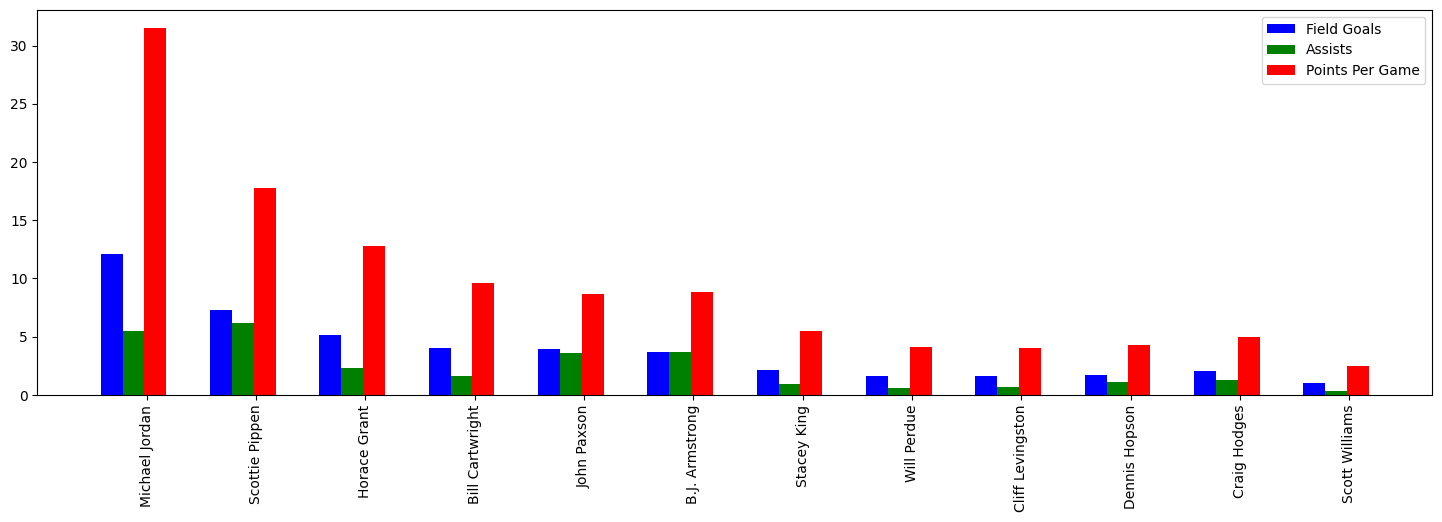

In [13]:
# Lets me plot the graph in a way that I can represt the data for the people quite easily
# Plots the data for everyone in the team
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(fg)) 
x = x -1

f, ax = plt.subplots(figsize=(18,5))

ax.bar(x-0.2, A["Field Goals"], width=0.2, color='b', align='center', label = "Field Goals")
ax.bar(x, A["Assists"], width=0.2, color='g', align='center', label = "Assists")
ax.bar(x+0.2, A["Points"], width=0.2, color='r', align='center', label = "Points Per Game")
ax.set_xticklabels(A["Names"], rotation = 90)
start, end = ax.get_xlim()
stepsiassiste = 1
ax.xaxis.set_ticks(np.arange(start + 1, end, stepsiassiste))

ax.legend()

In [9]:
# Lets plot the data where it's easy 

def PlayerData(name, pergame_table): # Takes in the player name and a list of dataframes
   pg = pergame_table[0]
   res = pg.loc[pg['Unnamed: 1'] == name]
   for i in range(1, len(pergame_table)):
      pg = pergame_table[i]
      a = pg.loc[pg['Unnamed: 1'] == name]
      res = pd.concat([res, a])
   return res

mj = PlayerData("Michael Jordan", pergame_table)
sp = PlayerData("Scottie Pippen", pergame_table)

n = pergame_table[0]
NameList = n["Unnamed: 1"]

playerlist = []
for i in NameList: 
   playerlist.append(PlayerData(str(i), pergame_table))

In [10]:
Years = []
fg = []
names = []
assist = []
ppg = []
for i in playerlist: 
    pg = FindStats(i)
    Years.append(pg["Year"])
    fg.append(pg["Field Goals"])
    names.append(pg["Names"])
    assist.append(pg["Assists"])
    ppg.append(pg["Points"])

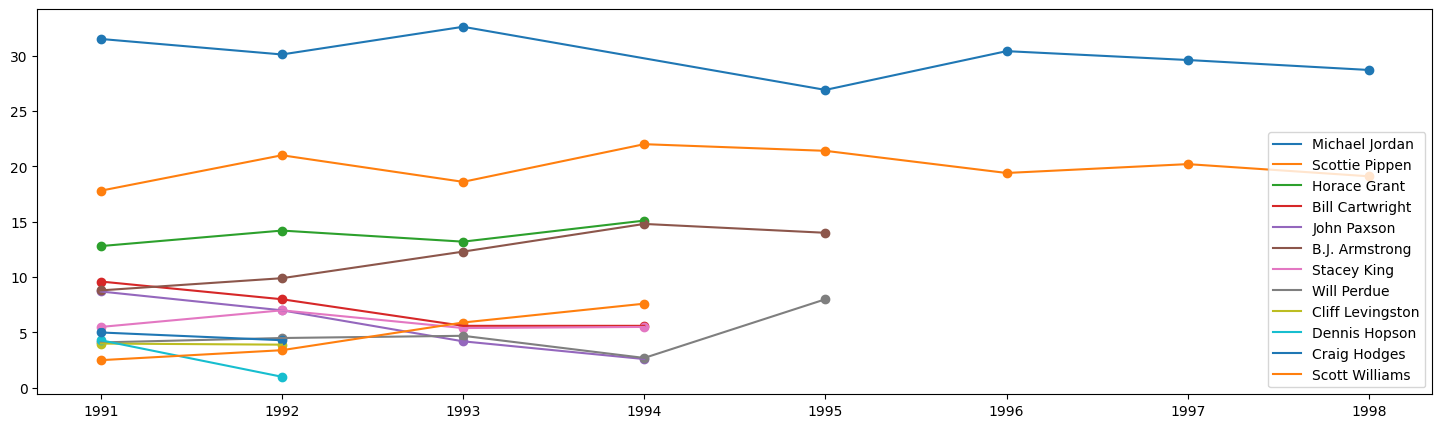

In [11]:
# f, ax = plt.subplots(figsize=(18,5))
# for k in range(len(playerlist)): 
#     ax.plot(Years[k], ppg[k], label = np.asarray(names[k])[0])
#     ax.scatter(Years[k], ppg[k])


# ax.legend()

